<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_06/lab_06.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [78]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [79]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_06/data/anscombe.csv")

df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

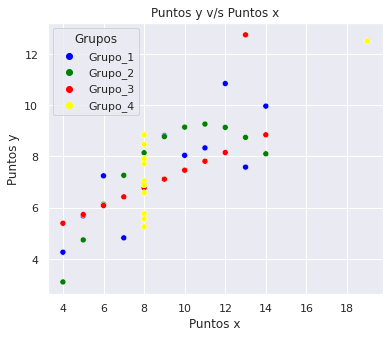

In [80]:
#Respuesta pregunta 1:
#Gráfico scatter mediante Seaborn.
sns.set(rc={'figure.figsize':(6,5)})#Tamaño.

sns.scatterplot(
        x='x',#Eje x.
        y='y',#Eje y.
        data=df,#DataFrame.
        hue='grupo',#Clasificación.
        palette = ['blue', 'green', 'red','yellow']#Colores.
    
)
plt.title('Puntos y v/s Puntos x')
plt.legend(frameon=True, title="Grupos")#Título de Caterias.
plt.xlabel("Puntos x")#Título Eje x.
plt.ylabel("Puntos y")#Título Eje y.
plt.show()#Mostrar gráfico.



A simple vista, con la superposición de los gráficos, podemos concluir que existen grupos que se parecen y otros que distan mucho de parecerse. El grupo 1 con el grupo 3 tienen distintas relaciones lineales simples respecto a las variables x e y,  pues el grupo 3 tiene un elemento atípico. Luego, el grupo 2 no se parece al grupo 1 ni al grupo 3, ya que la relación entre sus datos no es lineal, es polinómica. Por último, el grupo 4 no tine parecido con ninguno de los demás grupos, pues su tendencia no es lineal ni polinómica. Entonces los grupos sí son muy distintos entre sí, pues solo el grupo 1 y el grupo 3 tienen tendencia parecida.

In [81]:
#Respuesta pregunta 2:
groups = df.groupby(df.grupo)#Crea grupos de la columna grupo.
grupo_1 = groups.get_group("Grupo_1")#Se crea el grupo 1.
grupo_2=groups.get_group("Grupo_2")#Se crea el grupo 2.
grupo_3=groups.get_group("Grupo_3")#Se crea el grupo 3.
grupo_4=groups.get_group("Grupo_4")#Se crea el grupo 4.
grupo_1 = grupo_1.rename(columns={"x": "x_1", "y": "y_1"})#Renombrar variable dependiente e independiente para el grupo 1.
grupo_2 = grupo_2.rename(columns={"x": "x_2", "y": "y_2"})#Renombrar variable dependiente e independiente para el grupo 2.
grupo_3 = grupo_3.rename(columns={"x": "x_3", "y": "y_3"})#Renombrar variable dependiente e independiente para el grupo 3.
grupo_4 = grupo_4.rename(columns={"x": "x_4", "y": "y_4"})#Renombrar variable dependiente e independiente para el grupo 4.

In [82]:
#Describe grupo 1:
grupo_1.describe()

,x_1,y_1
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [83]:
#Describe grupo 2:
grupo_2.describe()

,x_2,y_2
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [84]:
#Describe grupo 3:
grupo_3.describe()

,x_3,y_3
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [86]:
#Describe grupo 4:
grupo_4.describe()

,x_4,y_4
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


Los primeros 3 grupos tienen estadisticas iguales para las variables independientes, mientras que el grupo 4 solo tiene igual count, mean y std para la variable dependiente.


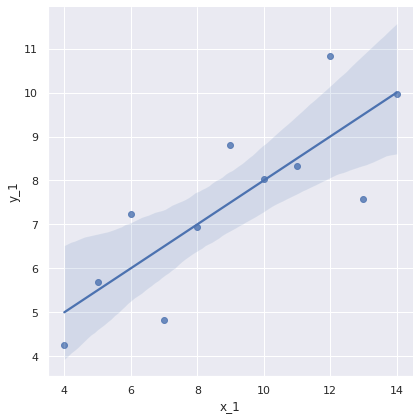

In [87]:
#Respuesta pregunta 3:
# grafico del grupo 1
sns.lmplot(
    x='x_1',
    y='y_1',
    data=grupo_1,
    height = 6,
)  
plt.show()

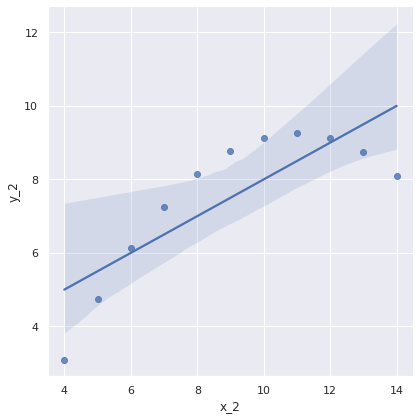

In [88]:
# grafico del grupo 2
sns.lmplot(
    x='x_2',
    y='y_2',
    data=grupo_2,
    height = 6,
)  
plt.show()

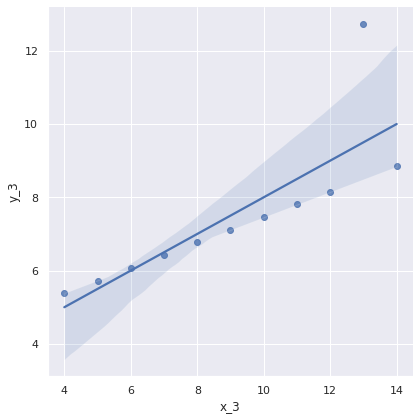

In [89]:
# grafico del grupo 3
sns.lmplot(
    x='x_3',
    y='y_3',
    data=grupo_3,
    height = 6,
)  
plt.show()

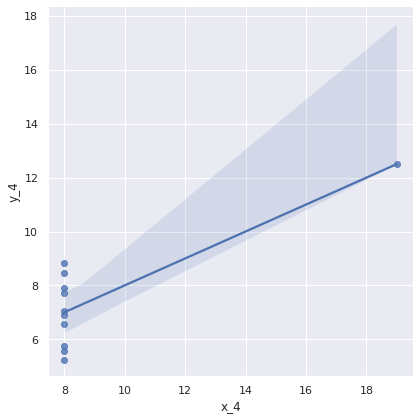

In [90]:
# grafico del grupo 4
sns.lmplot(
    x='x_4',
    y='y_4',
    data=grupo_4,
    height = 6,
)  
plt.show()

In [120]:
#Respuesta pregunta 4
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X_1 = grupo_1[['x_1']] # we only take the first two features.
y_1 = grupo_1['y_1']
X_2 = grupo_2[['x_2']] # we only take the first two features.
y_2 = grupo_2['y_2']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X_2))
print('numero de filas train set     : ',len(X_train_2))
print('numero de filas test set      : ',len(X_test_2))

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3


In [92]:
import statsmodels.api as sm

model = sm.OLS(y_train_2, sm.add_constant(X_train_2))
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [121]:
# predicciones
y_pred_2 = results.predict(sm.add_constant(X_test_2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [94]:
# resultados del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    y_1   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     9.834
Date:                Mon, 10 Oct 2022   Prob (F-statistic):             0.0202
Time:                        01:02:33   Log-Likelihood:                -12.443
No. Observations:                   8   AIC:                             28.89
Df Residuals:                       6   BIC:                             29.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4668      1.357      2.555      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [122]:
def mae(y, yhat) -> float:
    error = yhat - y
    return round(np.abs(error).mean())


In [123]:
a=mae(y_test_2,y_pred_2)
a

1